Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-
bankruptcy). The goal here is to model the probability that a business goes bankrupt
from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high
competitiveness.
6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7. class: bankruptcy, non-bankruptcy (target variable).

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#IMPORT DATASET
Bankruptcy = pd.read_excel("bankruptcyprevention.xlsx")
Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# EDA

In [50]:
Bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


No null values are present in the given dataset.

In [51]:
Bankruptcy.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
Bankruptcy.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Bankruptcy['class'] = label_encoder.fit_transform(Bankruptcy['class'])
Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


Assigning a value of '0' to the bankrupt column where the class column contains value 'bankruptcy'. Bankruptcy = 0, Non- Bankruptcy = 1

In [54]:
Bankruptcy.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [55]:
Bankruptcy.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


# DATA VISUALIZATION

<Axes: xlabel='class', ylabel='count'>

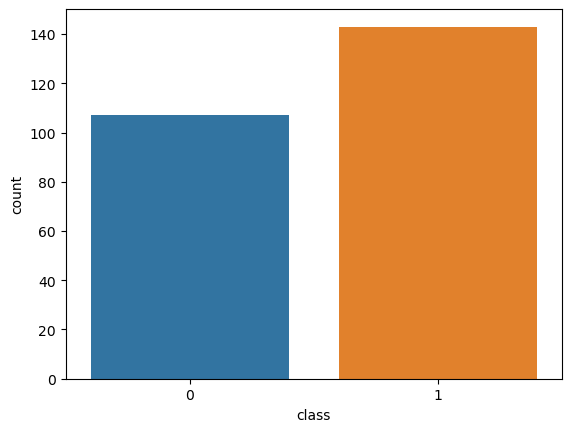

In [56]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['class'])

The companies that go bankrupt are around 110, the companies that do not go bankrupt are around 140


<Axes: xlabel='industrial_risk', ylabel='count'>

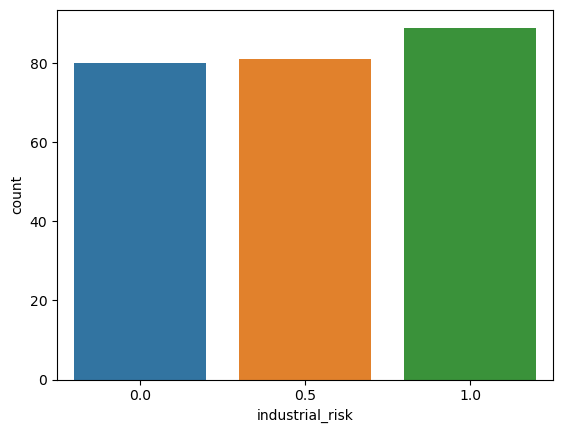

In [57]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['industrial_risk'])

Low and medium industrial risk companies are more compared to high industrial risk.

<Axes: xlabel='management_risk', ylabel='count'>

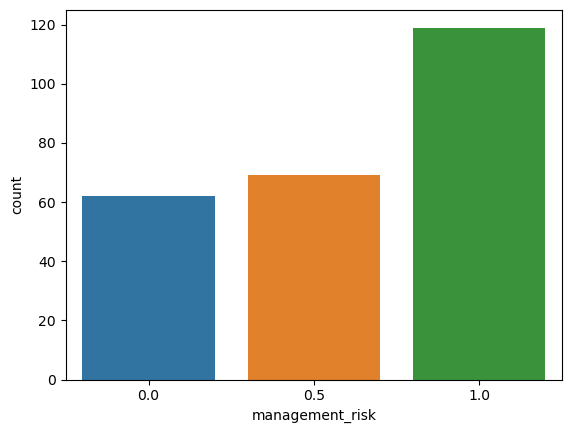

In [58]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['management_risk'])

High management risk companies are more.

<Axes: xlabel='financial_flexibility', ylabel='count'>

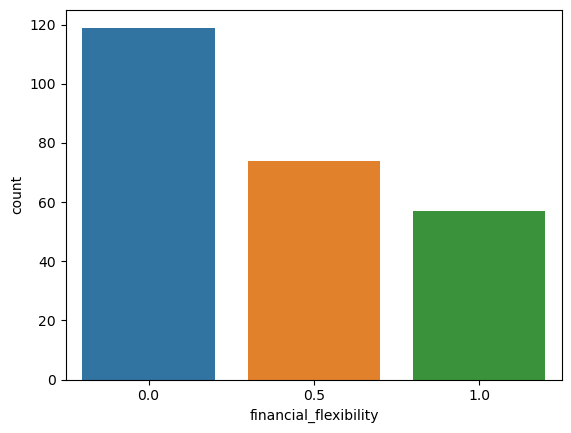

In [59]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['financial_flexibility'])

<Axes: xlabel='credibility', ylabel='count'>

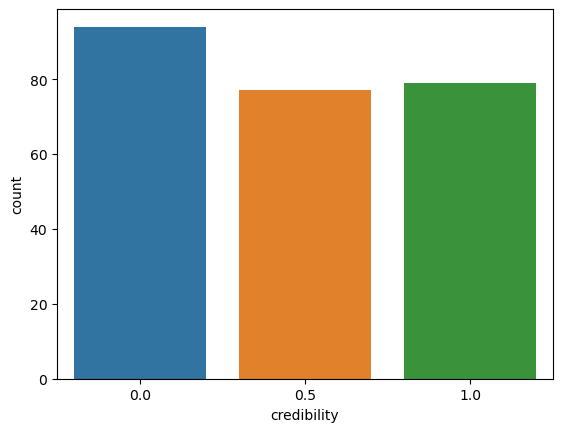

In [60]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['credibility'])

<Axes: xlabel='competitiveness', ylabel='count'>

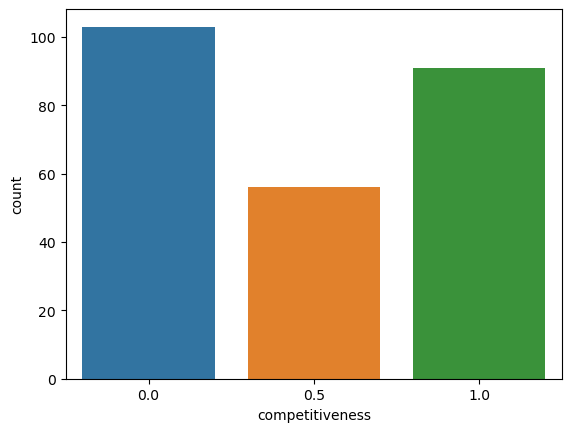

In [61]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['competitiveness'])

Low competitiveness companies are more.

<Axes: xlabel='operating_risk', ylabel='count'>

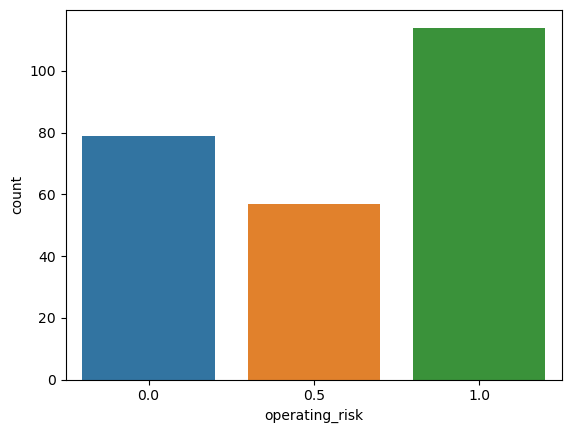

In [62]:
sns.countplot(data=Bankruptcy,x=Bankruptcy['operating_risk'])

<Axes: >

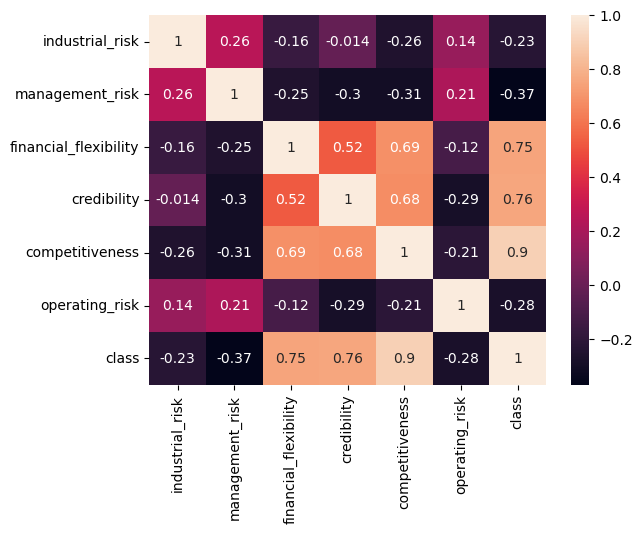

In [63]:
sns.heatmap(Bankruptcy.corr(),annot=True)

<Axes: xlabel='class'>

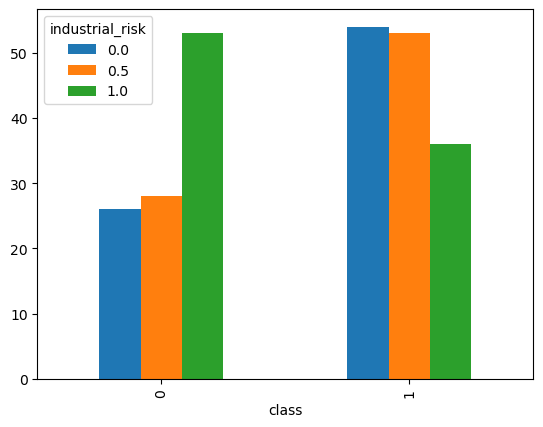

In [64]:
pd.crosstab(Bankruptcy['class'],Bankruptcy['industrial_risk']).plot(kind='bar')

<Axes: xlabel='financial_flexibility'>

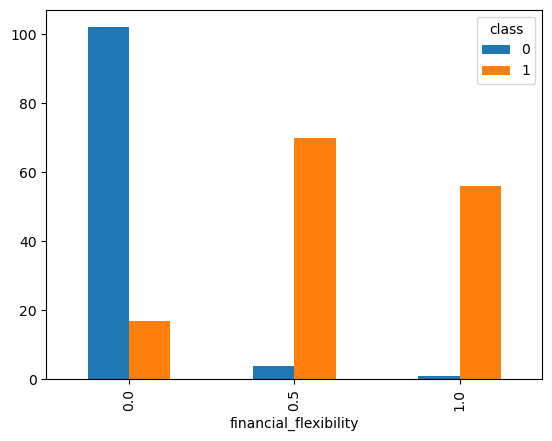

In [65]:
pd.crosstab(Bankruptcy['financial_flexibility'],Bankruptcy['class']).plot(kind='bar')

Medium and High Financial flexibility companies are exhibiting a stronger inclination towards non bankruptcy.

<Axes: xlabel='management_risk'>

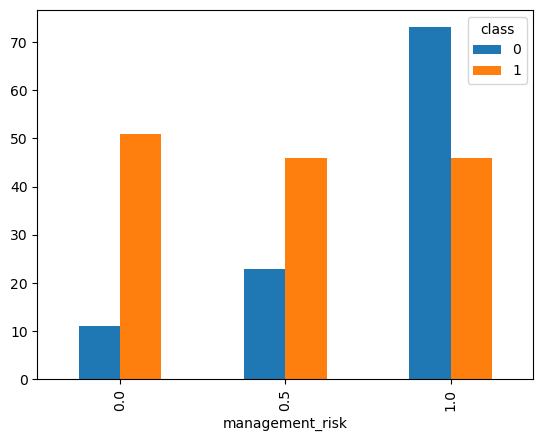

In [66]:
pd.crosstab(Bankruptcy['management_risk'],Bankruptcy['class']).plot(kind='bar')

<Axes: xlabel='credibility'>

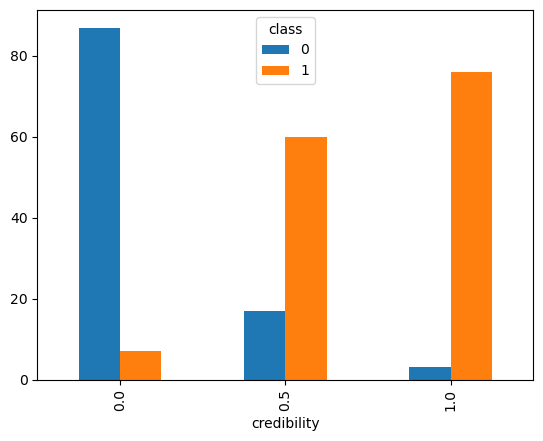

In [67]:
pd.crosstab(Bankruptcy['credibility'],Bankruptcy['class']).plot(kind='bar')

Medium and High Credibility companies are exhibiting a strong inclination towards non bankruptcy

<Axes: xlabel='competitiveness'>

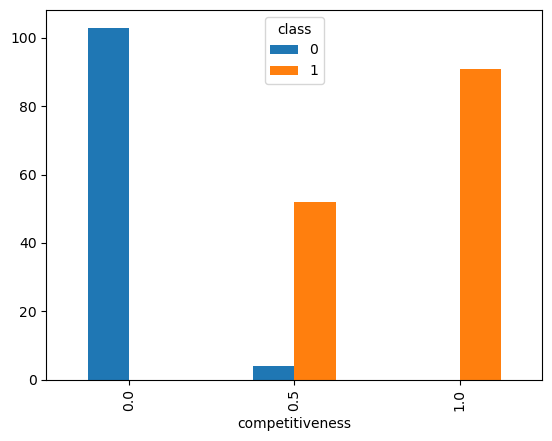

In [68]:
pd.crosstab(Bankruptcy['competitiveness'],Bankruptcy['class']).plot(kind='bar')

Highly competitive companies are showing no bankruptcy, whereas low competitive companies are showing high chances of bankruptcy

<Axes: xlabel='operating_risk'>

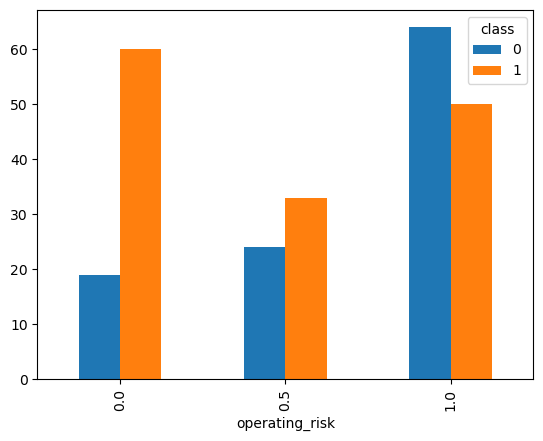

In [69]:
pd.crosstab(Bankruptcy['operating_risk'],Bankruptcy['class']).plot(kind='bar')

In [70]:
Bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


# MODEL BUILDING AND EVALUATION¶

In [71]:
#Import ML Libraries
from sklearn.model_selection import train_test_split
X = Bankruptcy.iloc[:,:-1]
y = Bankruptcy.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score

In [73]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (175, 6) (175,)
Test set: (75, 6) (75,)


# Support Vector Machine

In [74]:
clf = SVC(C= 1, gamma = 0.1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print("Svm_Accuracy =", svm_acc)
svm_prec = np.round(precision_score(y_test,y_pred),3)
print("Svm_Precision =", svm_prec)
svm_f1 = np.round(f1_score(y_test,y_pred),3)
print("Svm_f1score =", svm_f1)

confusion_matrix(y_test, y_pred)

Svm_Accuracy = 1.0
Svm_Precision = 1.0
Svm_f1score = 1.0


array([[28,  0],
       [ 0, 47]])

In [75]:
clf1 = SVC(C= 20, gamma = 52)
clf1.fit(X_train , y_train)
y_pred = clf.predict(X_test)
svm_acc1 = accuracy_score(y_test, y_pred)
print("Svm_Accuracy =", svm_acc1)
svm_prec1 = np.round(precision_score(y_test,y_pred),3)
print("Svm_Precision =", svm_prec1)
svm_f11 = np.round(f1_score(y_test,y_pred),3)
print("Svm_f1score =", svm_f11)

confusion_matrix(y_test, y_pred)

Svm_Accuracy = 1.0
Svm_Precision = 1.0
Svm_f1score = 1.0


array([[28,  0],
       [ 0, 47]])

# Naive Bayes Gaussian

In [76]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [77]:
Naive_GNB = GNB.fit(X_train,y_train)
y_pred= Naive_GNB.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)
print("NaiveGNB_Accuracy =", gnb_acc)
gnb_prec = np.round(precision_score(y_test,y_pred),3)
print("NaiveGNB_Precision =", gnb_prec)
gnb_f1 = np.round(f1_score(y_test,y_pred),3)
print("NaiveGNB_f1score =", gnb_f1)

confusion_matrix(y_test, y_pred)

NaiveGNB_Accuracy = 1.0
NaiveGNB_Precision = 1.0
NaiveGNB_f1score = 1.0


array([[28,  0],
       [ 0, 47]])

# KNN

In [78]:
import math
math.sqrt(len(y_test))

8.660254037844387

Choosing K value as 8

In [79]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNN_Classifier = KNC(n_neighbors=8, p=2, metric='euclidean')
KNN = KNN_Classifier.fit(X_train,y_train)
y_pred= KNN.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print("KNN_Accuracy =", knn_acc)
knn_prec = np.round(precision_score(y_test,y_pred),3)
print("KNN_Precision =", knn_prec)
knn_f1 = np.round(f1_score(y_test,y_pred),3)
print("KNN_f1score =", knn_f1)

confusion_matrix(y_test, y_pred)

KNN_Accuracy = 0.9866666666666667
KNN_Precision = 1.0
KNN_f1score = 0.989


array([[28,  0],
       [ 1, 46]])

# Logistic Regression

In [80]:
LR_Classifier = LogisticRegression()
LR = LR_Classifier.fit(X_train,y_train)
y_pred= LR.predict(X_test)
LR_acc = accuracy_score(y_test, y_pred)
print("LR_Accuracy =", LR_acc)
LR_prec = np.round(precision_score(y_test,y_pred),3)
print("LR_Precision =", LR_prec)
LR_f1 = np.round(f1_score(y_test,y_pred),3)
print("LR_f1score =", LR_f1)

confusion_matrix(y_test, y_pred)

LR_Accuracy = 1.0
LR_Precision = 1.0
LR_f1score = 1.0


array([[28,  0],
       [ 0, 47]])

# Decision Tree

In [81]:
#Building decision tree classifier using ENTROPY criteria
DT_Classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3)
DT = DT_Classifier.fit(X_train,y_train)


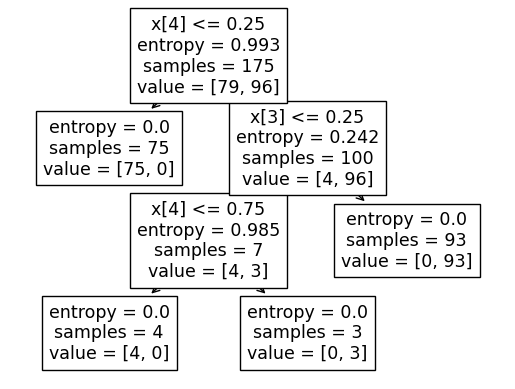

In [82]:
#Plot the decision tree
tree.plot_tree(DT);

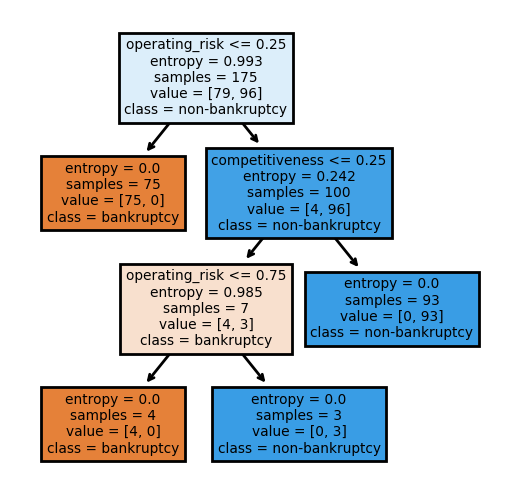

In [83]:
fn=['industrial_risk','management_risk','financial_flexibility','competitiveness','operating_risk','class']
cn=['bankruptcy','non-bankruptcy']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200)
tree.plot_tree(DT,feature_names=fn,class_names=cn,filled=True);

In [84]:
#To know the most important feature/root node
DT.feature_importances_

array([0.        , 0.        , 0.        , 0.09972346, 0.90027654,
       0.        ])

In [85]:
feature_imp=pd.Series(DT.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

operating_risk           0.900277
competitiveness          0.099723
industrial_risk          0.000000
management_risk          0.000000
financial_flexibility    0.000000
class                    0.000000
dtype: float64

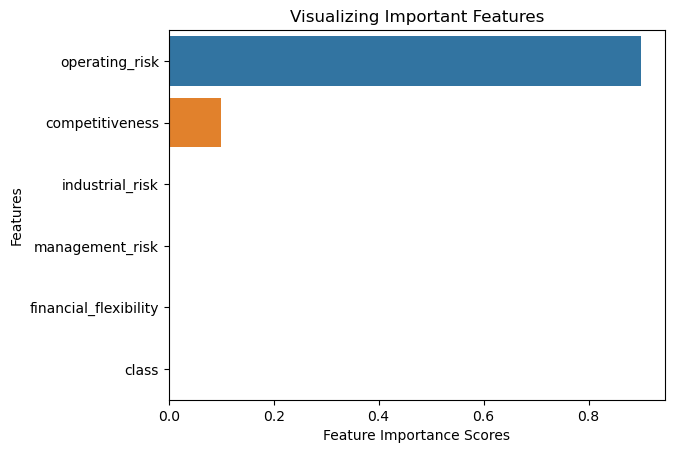

In [86]:
%matplotlib inline
#Creating a barplot for most important features
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [87]:
y_pred= DT.predict(X_test)
DT_acc = accuracy_score(y_test, y_pred)
print("DT_Accuracy =", DT_acc)
DT_prec = np.round(precision_score(y_test,y_pred),3)
print("DT_Precision =", DT_prec)
DT_f1 = np.round(f1_score(y_test,y_pred),3)
print("DT_f1score =", DT_f1)

confusion_matrix(y_test, y_pred)

DT_Accuracy = 0.9866666666666667
DT_Precision = 1.0
DT_f1score = 0.989


array([[28,  0],
       [ 1, 46]])

In [88]:
#Building decision tree classifier(CART) using GINI criteria
from sklearn.tree import DecisionTreeClassifier
DT_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
DT_gini.fit(X_train,y_train)
y_pred= DT_gini.predict(X_test)
DTgini_acc = accuracy_score(y_test, y_pred)
print("DTGini_Accuracy =", DTgini_acc)

DTGini_Accuracy = 0.9866666666666667


# Random Forest Model

In [89]:
RF_Classifier = RandomForestClassifier()
RF = RF_Classifier.fit(X_train,y_train)
y_pred= RF.predict(X_test)
RF_acc = accuracy_score(y_test, y_pred)
print("RF_Accuracy =", RF_acc)
RF_prec = np.round(precision_score(y_test,y_pred),3)
print("RF_Precision =", RF_prec)
RF_f1 = np.round(f1_score(y_test,y_pred),3)
print("RF_f1score =", RF_f1)

confusion_matrix(y_test, y_pred)


RF_Accuracy = 1.0
RF_Precision = 1.0
RF_f1score = 1.0


array([[28,  0],
       [ 0, 47]])

# Adaboosting and GradientBoosting

In [90]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [91]:
Ada_Classifier = AdaBoostClassifier()
ADA = Ada_Classifier.fit(X_train,y_train)
y_pred= ADA.predict(X_test)
ADA_acc = accuracy_score(y_test, y_pred)
print("ADA_Accuracy =", ADA_acc)
ADA_prec = np.round(precision_score(y_test,y_pred),3)
print("ADA_Precision =", ADA_prec)
ADA_f1 = np.round(f1_score(y_test,y_pred),3)
print("ADA_f1score =", ADA_f1)

confusion_matrix(y_test, y_pred)

ADA_Accuracy = 0.9866666666666667
ADA_Precision = 1.0
ADA_f1score = 0.989


array([[28,  0],
       [ 1, 46]])

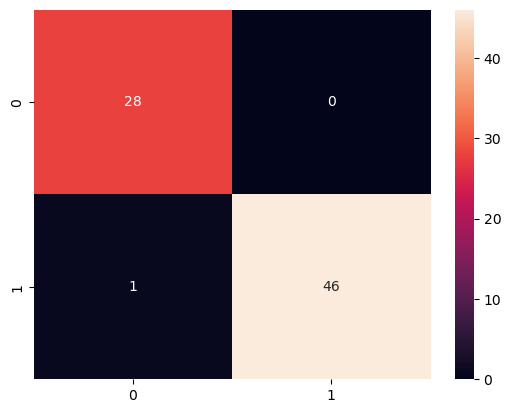

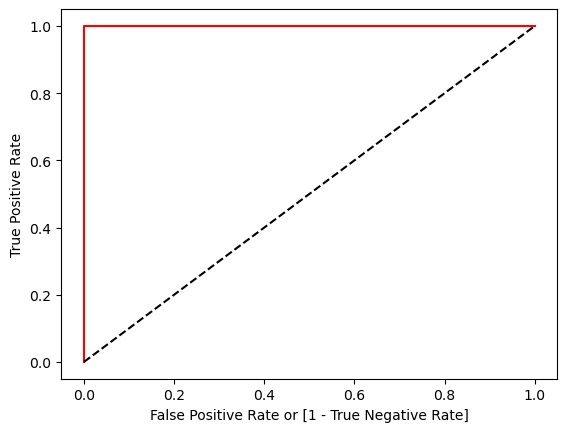

In [92]:
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, ADA.predict_proba (X_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [93]:
Gradient_Classifier = GradientBoostingClassifier()
Grad = Gradient_Classifier.fit(X_train,y_train)
y_pred= Grad.predict(X_test)
Grad_acc = accuracy_score(y_test, y_pred)
print("Grad_Accuracy =", Grad_acc)
Grad_prec = np.round(precision_score(y_test,y_pred),3)
print("Grad_Precision =", Grad_prec)
Grad_f1 = np.round(f1_score(y_test,y_pred),3)
print("Grad_f1score =", Grad_f1)

confusion_matrix(y_test, y_pred)

Grad_Accuracy = 0.9866666666666667
Grad_Precision = 1.0
Grad_f1score = 0.989


array([[28,  0],
       [ 1, 46]])

# Final Table

In [94]:
Bankruptcy_modeldata = {"Models":pd.Series(["Support Vector Machine","Decision Tree","Random Forest","KNN","Naive Bayes Gaussian","Logistic Regression","AdaBoosting","GradientBoosting"]),
                  "Accuracy":pd.Series([svm_acc,DT_acc,RF_acc,knn_acc,gnb_acc,LR_acc,ADA_acc,Grad_acc]), "Precision":pd.Series([svm_prec,DT_prec,RF_prec,knn_prec,gnb_prec,LR_prec,ADA_prec,Grad_prec]),"F1 Score":pd.Series([svm_f1,DT_f1,RF_f1,knn_f1,gnb_f1,LR_f1,ADA_f1,Grad_f1])}
table =pd.DataFrame(Bankruptcy_modeldata)
table.sort_values(['Accuracy'])

,Models,Accuracy,Precision,F1 Score
1,Decision Tree,0.986667,1.0,0.989
3,KNN,0.986667,1.0,0.989
6,AdaBoosting,0.986667,1.0,0.989
7,GradientBoosting,0.986667,1.0,0.989
0,Support Vector Machine,1.000000,1.0,1.000
2,Random Forest,1.000000,1.0,1.000
4,Naive Bayes Gaussian,1.000000,1.0,1.000
5,Logistic Regression,1.000000,1.0,1.000


Decision Tree and KNN models are generally more interpretable compared to boosting algorithms like AdaBoosting and Gradient Boosting. As the dataset is not too noisy and small deploying the model with the help of Decision Tree Classifier.
Not considering the remaining models as they are overfitting.